# Cross Validation Techniques

# EXHAUSTIVE:
According to Wikipedia, exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.<br>

Two types of exhaustive cross-validation are<br>

## 1)  Leave-P-Out Cross-Validation:

In this strategy, p observations are used for validation, and the remaining is used for training.<br>

For a data set with n observations, n-p observations will be used for training, and p will be used for validation.<br>

Since this method is exhaustive, it trains and tests on all possible combinations, and it can become computationally expensive for large values of p.<br>

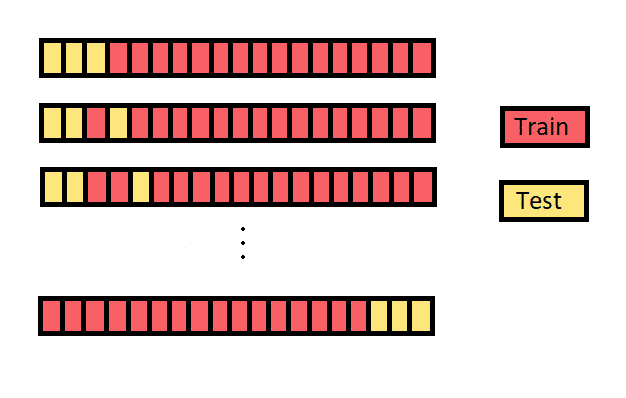

In [6]:
import numpy as np
from sklearn.model_selection import LeavePOut

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

lpo = LeavePOut(p=2)

for train, validate in lpo.split(data):
    print("Train set:{}".format(data[train]), "Test set:{}".format(data[validate]))

Train set:[0.3 0.4 0.5 0.6] Test set:[0.1 0.2]
Train set:[0.2 0.4 0.5 0.6] Test set:[0.1 0.3]
Train set:[0.2 0.3 0.5 0.6] Test set:[0.1 0.4]
Train set:[0.2 0.3 0.4 0.6] Test set:[0.1 0.5]
Train set:[0.2 0.3 0.4 0.5] Test set:[0.1 0.6]
Train set:[0.1 0.4 0.5 0.6] Test set:[0.2 0.3]
Train set:[0.1 0.3 0.5 0.6] Test set:[0.2 0.4]
Train set:[0.1 0.3 0.4 0.6] Test set:[0.2 0.5]
Train set:[0.1 0.3 0.4 0.5] Test set:[0.2 0.6]
Train set:[0.1 0.2 0.5 0.6] Test set:[0.3 0.4]
Train set:[0.1 0.2 0.4 0.6] Test set:[0.3 0.5]
Train set:[0.1 0.2 0.4 0.5] Test set:[0.3 0.6]
Train set:[0.1 0.2 0.3 0.6] Test set:[0.4 0.5]
Train set:[0.1 0.2 0.3 0.5] Test set:[0.4 0.6]
Train set:[0.1 0.2 0.3 0.4] Test set:[0.5 0.6]


## 2) Leave-one-out Cross-Validation:

This is a variant of LPO. When p = 1 in Leave-P-Out cross-validation then it is Leave-One-Out cross-validation.<br>

In LOO, one observation is taken out of the training set as a validation set.<br>

We will train the model without this validation set and later test whether it correctly classify the observation.<br>

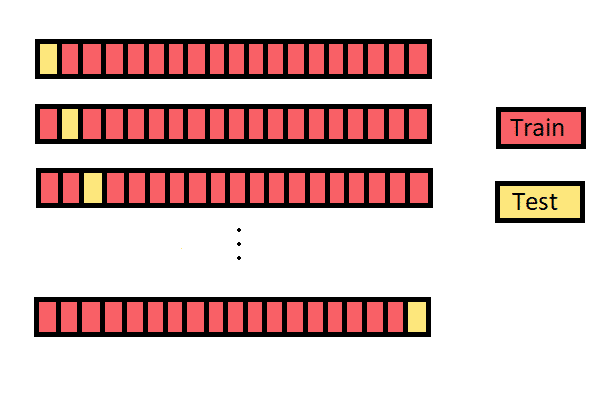

In [7]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

loo = LeaveOneOut()
for train, test in loo.split(data):
    print('Train:', data[train], 'Test:', data[test])

Train: [0.2 0.3 0.4 0.5 0.6] Test: [0.1]
Train: [0.1 0.3 0.4 0.5 0.6] Test: [0.2]
Train: [0.1 0.2 0.4 0.5 0.6] Test: [0.3]
Train: [0.1 0.2 0.3 0.5 0.6] Test: [0.4]
Train: [0.1 0.2 0.3 0.4 0.6] Test: [0.5]
Train: [0.1 0.2 0.3 0.4 0.5] Test: [0.6]


# NON-EXHAUSTIVE:
In the non-exhaustive method, we don’t compute for all possible combinations of the original data.

## 1) HOLDOUT:
This is the simplest method of all. In Holdout validation, the data is randomly partitioned into train and test set.<br>
Most of the times it is 70/30 or 80/20 split.<br>
We train our model in the training set, and it’ll be tested in the test set to see how well the model is performing for unknown events.<br>

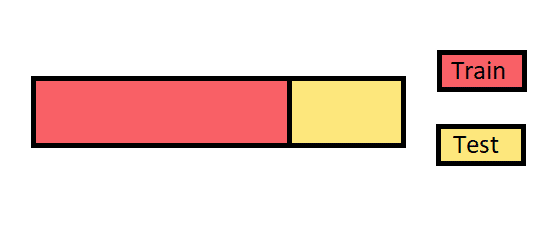

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

train, test = train_test_split(data, test_size=0.3, random_state=43)

print('Train:', train, 'Test:', test)

Train: [0.8 0.3 0.6 0.2 0.1 0.5] Test: [0.4 0.9 0.7]


# 2) K-FOLD:
This is the frequently used cross-validation method.<br>

In k-fold cross-validation, we split the training data set randomly into k equal subsets or folds.<br>

Out of these k subsets, we’ll treat k-1 subsets as the training set and the remaining as our test set.<br>

This process is repeated for k iterations. For each iteration, a different fold is held-out for testing, and the remaining k-1 is used for training.<br>

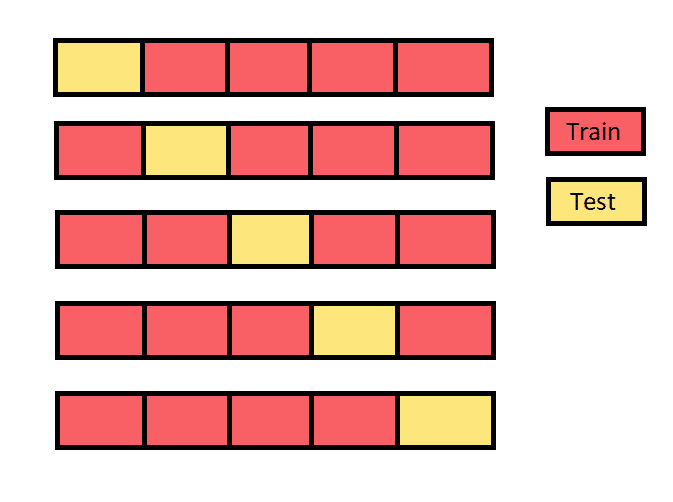

In [9]:
import numpy as np 
from sklearn.model_selection import KFold

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

kf = KFold(n_splits=3)

for train, test in kf.split(data):
    print('Train{}'.format(data[train]), 'Test{}'.format(data[test]))

Train[0.4 0.5 0.6 0.7 0.8 0.9] Test[0.1 0.2 0.3]
Train[0.1 0.2 0.3 0.7 0.8 0.9] Test[0.4 0.5 0.6]
Train[0.1 0.2 0.3 0.4 0.5 0.6] Test[0.7 0.8 0.9]


# 3) STRATIFIED K-FOLD:
We use stratified K-fold to cope with class imbalances in the data set.<br>

Stratified K-fold maintains the class proportions by splitting the data set in such a way that they contain approximately the same proportions of labels as in the original data set.<br>

This strategy guarantees that when the data set is unbalanced, one class of the data is not over-represented.<br>

In [10]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y = np.array([1,1,1,1,1,0])

skf = StratifiedKFold(n_splits = 2, shuffle=True)

for train, validate in skf.split(data, y):
    print('Tran:', data[train], 'Test:', data[validate])

Tran: [0.3 0.5 0.6] Test: [0.1 0.2 0.4]
Tran: [0.1 0.2 0.4] Test: [0.3 0.5 0.6]


C:\Users\Lovely\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
